In [ ]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#import tensorflow as tf

In [ ]:
import tensorflow as tf

In [ ]:
MSFT_data=pd.read_csv('MSFT1.csv')

In [ ]:
MSFT_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-27,83.309998,83.980003,83.300003,83.870003,78.981636,18265200
1,2017-11-28,84.070000,85.059998,84.019997,84.879997,79.932762,21926000
2,2017-11-29,84.709999,84.919998,83.180000,83.339996,78.482513,27381100
3,2017-11-30,83.510002,84.519997,83.339996,84.169998,79.264130,33054600
4,2017-12-01,83.599998,84.809998,83.220001,84.260002,79.348900,29532100


In [ ]:
total_data=MSFT_data
total_data.rename(columns={'Adj Close':'MSFT'},inplace=True)

In [ ]:
total_data.head()

,Date,Open,High,Low,Close,MSFT,Volume
0,2017-11-27,83.309998,83.980003,83.300003,83.870003,78.981636,18265200
1,2017-11-28,84.070000,85.059998,84.019997,84.879997,79.932762,21926000
2,2017-11-29,84.709999,84.919998,83.180000,83.339996,78.482513,27381100
3,2017-11-30,83.510002,84.519997,83.339996,84.169998,79.264130,33054600
4,2017-12-01,83.599998,84.809998,83.220001,84.260002,79.348900,29532100


In [ ]:
date_time = pd.to_datetime(total_data.pop('Date'), format='%Y-%m-%d')

In [ ]:
total_data.head()

,Open,High,Low,Close,MSFT,Volume
0,83.309998,83.980003,83.300003,83.870003,78.981636,18265200
1,84.070000,85.059998,84.019997,84.879997,79.932762,21926000
2,84.709999,84.919998,83.180000,83.339996,78.482513,27381100
3,83.510002,84.519997,83.339996,84.169998,79.264130,33054600
4,83.599998,84.809998,83.220001,84.260002,79.348900,29532100


In [ ]:
total_data.index=date_time

In [ ]:
total_data.head()

,Open,High,Low,Close,MSFT,Volume
Date,,,,,,
2017-11-27,83.309998,83.980003,83.300003,83.870003,78.981636,18265200
2017-11-28,84.070000,85.059998,84.019997,84.879997,79.932762,21926000
2017-11-29,84.709999,84.919998,83.180000,83.339996,78.482513,27381100
2017-11-30,83.510002,84.519997,83.339996,84.169998,79.264130,33054600
2017-12-01,83.599998,84.809998,83.220001,84.260002,79.348900,29532100


In [ ]:
total_data=total_data.drop(['Open','High','Low','Close','Volume'],axis=1)

In [ ]:
total_data.head()

,MSFT
Date,
2017-11-27,78.981636
2017-11-28,79.932762
2017-11-29,78.482513
2017-11-30,79.264130
2017-12-01,79.348900


In [ ]:
total_data=total_data.dropna()

In [ ]:
len(total_data)

1259

In [ ]:
n=len(total_data)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
df_scaled=scaler.fit_transform(total_data.to_numpy())

In [ ]:
df_scaled

array([[0.00996847],
       [0.01357709],
       [0.00807477],
       ...,
       [0.63996425],
       [0.64963909],
       [0.64929764]])

In [ ]:
list(total_data.columns)

['MSFT']

In [ ]:
df_scaled=pd.DataFrame(df_scaled,columns=list(total_data.columns))

In [ ]:
df_scaled.head()

,MSFT
0,0.009968
1,0.013577
2,0.008075
3,0.011040
4,0.011362


In [ ]:
df_scaled.index=date_time

In [ ]:
df_scaled.head()

,MSFT
Date,
2017-11-27,0.009968
2017-11-28,0.013577
2017-11-29,0.008075
2017-11-30,0.011040
2017-12-01,0.011362


In [ ]:
total_data=df_scaled

In [ ]:
total_data.head()

,MSFT
Date,
2017-11-27,0.009968
2017-11-28,0.013577
2017-11-29,0.008075
2017-11-30,0.011040
2017-12-01,0.011362


In [ ]:
total_data=total_data[['MSFT']]

In [ ]:
total_data.head()

,MSFT
Date,
2017-11-27,0.009968
2017-11-28,0.013577
2017-11-29,0.008075
2017-11-30,0.011040
2017-12-01,0.011362


In [ ]:
train_df=total_data[:int(n*0.7)]
val_df=total_data[int(n*0.7):int(n*0.9)]
test_df=total_data[int(n*0.9):]

num_features=total_data.shape[1]

In [ ]:
len(train_df)

881

In [ ]:
num_features

1

In [ ]:
class WindowGenerator():
  def __init__(self,input_width, label_width, shift,
               train_df=train_df,val_df=val_df,test_df=test_df,
               label_columns=None):
     #Store the raw data
     self.train_df=train_df
     self.val_df=val_df
     self.test_df=test_df

     #work out the label column indices
     self.label_columns=label_columns
     if label_columns is not None:
       self.label_columns_indices={name:i for i,name in enumerate(label_columns)}
     self.column_indices={name:i for i,name in enumerate(train_df.columns)}

     #Work out the window parameters
     self.input_width=input_width
     self.label_width=label_width
     self.shift=shift

     self.total_window_size=input_width+shift

     self.input_slice=slice(0,input_width)
     self.input_indices=np.arange(self.total_window_size)[self.input_slice]

     self.label_start=self.total_window_size-self.label_width
     self.labels_slice=slice(self.label_start,None)
     self.label_indices=np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size:{self.total_window_size}',
        f'Input indices:{self.input_indices}',
        f'Label indices:{self.label_indices}',
        f'Label column name(s):{self.label_columns}'
    ]) 

In [ ]:
def split_window(self,features):
  inputs=features[:,self.input_slice,:]
  labels=features[:,self.labels_slice,:]
  if self.label_columns is not None:
    labels=tf.stack(
        [labels[:,:,self.column_indices[name]] for name in self.label_columns],
                    axis=-1)
    
  #slicing doesn't preserve statics shape information, so set the shapes
  #munually. This way the 'tf.datasets' are eaiser to inspect
  inputs.set_shape([None,self.input_width,None])
  labels.set_shape([None,self.label_width,None])

  return inputs,labels

WindowGenerator.split_window=split_window  

In [ ]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [ ]:
MAX_EPOCHS = 50

def compile_and_fit(model, window, patience=8):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=patience)


  model.compile(loss=tf.keras.losses.MeanSquaredError(),
         # loss='mae',      
                optimizer=tf.keras.optimizers.Adam(),
                #optimizer=tf.keras.optimizers.RMSprop(0.0001),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [ ]:
OUT_STEPS=60

In [ ]:
wide_window=WindowGenerator(input_width=90,label_width=OUT_STEPS,shift=OUT_STEPS)

In [ ]:
wide_window

Total window size:150
Input indices:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]
Label indices:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149]
Label column name(s):None

In [ ]:
tf.random.set_seed(123)

In [ ]:
multi_lstm=tf.keras.Sequential([ 
    tf.keras.layers.LSTM(128,return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(64,return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32,return_sequences=False),
    tf.keras.layers.Dense(OUT_STEPS*num_features),
    tf.keras.layers.Reshape([OUT_STEPS,num_features])
])

In [ ]:
history=compile_and_fit(multi_lstm,wide_window)

Epoch 1/50
23/23 [==============================] - 13s 296ms/step - loss: 0.0736 - mean_absolute_error: 0.2052 - val_loss: 0.3027 - val_mean_absolute_error: 0.4857
Epoch 2/50
23/23 [==============================] - 5s 236ms/step - loss: 0.0133 - mean_absolute_error: 0.0733 - val_loss: 0.0911 - val_mean_absolute_error: 0.2702
Epoch 3/50
23/23 [==============================] - 5s 236ms/step - loss: 0.0025 - mean_absolute_error: 0.0371 - val_loss: 0.0570 - val_mean_absolute_error: 0.2180
Epoch 4/50
23/23 [==============================] - 5s 235ms/step - loss: 0.0020 - mean_absolute_error: 0.0336 - val_loss: 0.0558 - val_mean_absolute_error: 0.2169
Epoch 5/50
23/23 [==============================] - 6s 240ms/step - loss: 0.0019 - mean_absolute_error: 0.0324 - val_loss: 0.0512 - val_mean_absolute_error: 0.2062
Epoch 6/50
23/23 [==============================] - 6s 239ms/step - loss: 0.0019 - mean_absolute_error: 0.0325 - val_loss: 0.0453 - val_mean_absolute_error: 0.1918
Epoch 7/50
23/2

In [ ]:
last_90_data=total_data[-90:].to_numpy()
tensor_data=tf.convert_to_tensor(last_90_data[np.newaxis])

In [ ]:
predicted_next_60=multi_lstm(tensor_data)[0].numpy()

In [ ]:
min_value=min(MSFT_data['MSFT'])

In [ ]:
max_value=max(MSFT_data['MSFT'])

In [ ]:
tranform_back=(max_value-min_value)*predicted_next_60[:,0]+min_value

In [ ]:
predicted_next_60_list=list(tranform_back)

In [ ]:
MSFT_data.head()

,Open,High,Low,Close,MSFT,Volume
Date,,,,,,
2017-11-27,83.309998,83.980003,83.300003,83.870003,78.981636,18265200
2017-11-28,84.070000,85.059998,84.019997,84.879997,79.932762,21926000
2017-11-29,84.709999,84.919998,83.180000,83.339996,78.482513,27381100
2017-11-30,83.510002,84.519997,83.339996,84.169998,79.264130,33054600
2017-12-01,83.599998,84.809998,83.220001,84.260002,79.348900,29532100


In [ ]:
predicted_next_60_list.insert(0,MSFT_data['MSFT'][-1])

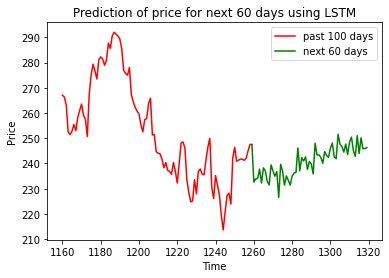

In [ ]:
plt.plot(range(1160,1260),MSFT_data['MSFT'][-100:],color='r',label='past 100 days')
plt.plot(range(1259,1320),predicted_next_60_list,color='g',label='next 60 days')

plt.ylabel('Price')
plt.xlabel('Time')
plt.title('Prediction of price for next 60 days using LSTM')
plt.legend()
plt.show()

In [ ]:
total_data.tail()

,MSFT
Date,
2022-11-18,0.625509
2022-11-21,0.628658
2022-11-22,0.639964
2022-11-23,0.649639
2022-11-25,0.649298


Try Gru

In [ ]:
multi_GRU=tf.keras.Sequential([ 
    tf.keras.layers.GRU(128,return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.GRU(64,return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GRU(32,return_sequences=False),
    #tf.keras.layers
    tf.keras.layers.Dense(OUT_STEPS*num_features),
    tf.keras.layers.Reshape([OUT_STEPS,num_features])
    ])

In [ ]:
history=compile_and_fit(multi_GRU,wide_window)

Epoch 1/50
23/23 [==============================] - 12s 255ms/step - loss: 0.0571 - mean_absolute_error: 0.1815 - val_loss: 0.1209 - val_mean_absolute_error: 0.2950
Epoch 2/50
23/23 [==============================] - 5s 197ms/step - loss: 0.0059 - mean_absolute_error: 0.0558 - val_loss: 0.0337 - val_mean_absolute_error: 0.1525
Epoch 3/50
23/23 [==============================] - 5s 196ms/step - loss: 0.0024 - mean_absolute_error: 0.0367 - val_loss: 0.0280 - val_mean_absolute_error: 0.1395
Epoch 4/50
23/23 [==============================] - 5s 196ms/step - loss: 0.0021 - mean_absolute_error: 0.0342 - val_loss: 0.0214 - val_mean_absolute_error: 0.1182
Epoch 5/50
23/23 [==============================] - 5s 197ms/step - loss: 0.0020 - mean_absolute_error: 0.0331 - val_loss: 0.0261 - val_mean_absolute_error: 0.1339
Epoch 6/50
23/23 [==============================] - 5s 199ms/step - loss: 0.0019 - mean_absolute_error: 0.0328 - val_loss: 0.0201 - val_mean_absolute_error: 0.1149
Epoch 7/50
23/2

In [ ]:
last_90_data=total_data[-90:].to_numpy()
tensor_data=tf.convert_to_tensor(last_90_data[np.newaxis])

In [ ]:
predicted_next_60=multi_GRU(tensor_data)[0].numpy()

In [ ]:
min_value=min(MSFT_data['MSFT'])
max_value=max(MSFT_data['MSFT'])

In [ ]:
tranform_back=(max_value-min_value)*predicted_next_60[:,0]+min_value

In [ ]:
predicted_next_60_list=list(tranform_back)

In [ ]:
predicted_next_60_list.insert(0,MSFT_data['MSFT'][-1])

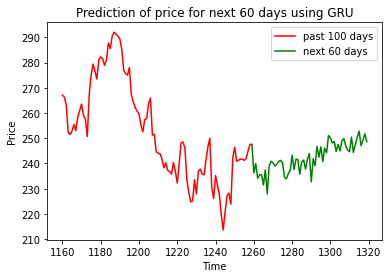

In [ ]:
plt.plot(range(1160,1260),MSFT_data['MSFT'][-100:],color='r',label='past 100 days')
plt.plot(range(1259,1320),predicted_next_60_list,color='g',label='next 60 days')

plt.ylabel('Price')
plt.xlabel('Time')
plt.title('Prediction of price for next 60 days using GRU')
plt.legend()
plt.show()

#Train the model again

Second

In [ ]:
multi_lstm=tf.keras.Sequential([ 
    tf.keras.layers.LSTM(128,return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(64,return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32,return_sequences=False),
    tf.keras.layers.Dense(OUT_STEPS*num_features),
    tf.keras.layers.Reshape([OUT_STEPS,num_features])
])

In [ ]:
history=compile_and_fit(multi_lstm,wide_window)

Epoch 1/50
23/23 [==============================] - 13s 301ms/step - loss: 0.0523 - mean_absolute_error: 0.1646 - val_loss: 0.1928 - val_mean_absolute_error: 0.3917
Epoch 2/50
23/23 [==============================] - 5s 236ms/step - loss: 0.0074 - mean_absolute_error: 0.0586 - val_loss: 0.0878 - val_mean_absolute_error: 0.2753
Epoch 3/50
23/23 [==============================] - 6s 237ms/step - loss: 0.0025 - mean_absolute_error: 0.0369 - val_loss: 0.0670 - val_mean_absolute_error: 0.2405
Epoch 4/50
23/23 [==============================] - 6s 244ms/step - loss: 0.0020 - mean_absolute_error: 0.0335 - val_loss: 0.0622 - val_mean_absolute_error: 0.2303
Epoch 5/50
23/23 [==============================] - 6s 239ms/step - loss: 0.0020 - mean_absolute_error: 0.0332 - val_loss: 0.0595 - val_mean_absolute_error: 0.2240
Epoch 6/50
23/23 [==============================] - 6s 239ms/step - loss: 0.0021 - mean_absolute_error: 0.0348 - val_loss: 0.0559 - val_mean_absolute_error: 0.2160
Epoch 7/50
23/2

In [ ]:
last_90_data=total_data[-90:].to_numpy()
tensor_data=tf.convert_to_tensor(last_90_data[np.newaxis])

In [ ]:
predicted_next_60=multi_lstm(tensor_data)[0].numpy()

In [ ]:
min_value=min(MSFT_data['MSFT'])
max_value=max(MSFT_data['MSFT'])

In [ ]:
tranform_back=(max_value-min_value)*predicted_next_60[:,0]+min_value
predicted_next_60_list=list(tranform_back)
predicted_next_60_list.insert(0,MSFT_data['MSFT'][-1])

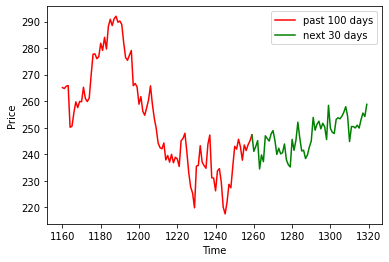

In [ ]:
plt.plot(range(1160,1260),MSFT_data['MSFT'][-100:],color='r',label='past 100 days')
plt.plot(range(1259,1320),predicted_next_60_list,color='g',label='next 60 days')

plt.ylabel('Price')
plt.xlabel('Time')
plt.legend()
plt.show()

Third

In [ ]:
multi_lstm=tf.keras.Sequential([ 
    tf.keras.layers.LSTM(128,return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(64,return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32,return_sequences=False),
    #tf.keras.layers
    tf.keras.layers.Dense(OUT_STEPS*num_features),
    tf.keras.layers.Reshape([OUT_STEPS,num_features])
])

In [ ]:
history=compile_and_fit(multi_lstm,wide_window)

Epoch 1/50
23/23 [==============================] - 15s 291ms/step - loss: 0.0621 - mean_absolute_error: 0.1897 - val_loss: 0.2319 - val_mean_absolute_error: 0.4280
Epoch 2/50
23/23 [==============================] - 5s 234ms/step - loss: 0.0091 - mean_absolute_error: 0.0639 - val_loss: 0.0747 - val_mean_absolute_error: 0.2501
Epoch 3/50
23/23 [==============================] - 5s 233ms/step - loss: 0.0024 - mean_absolute_error: 0.0361 - val_loss: 0.0548 - val_mean_absolute_error: 0.2128
Epoch 4/50
23/23 [==============================] - 8s 359ms/step - loss: 0.0020 - mean_absolute_error: 0.0338 - val_loss: 0.0513 - val_mean_absolute_error: 0.2053
Epoch 5/50
23/23 [==============================] - 5s 235ms/step - loss: 0.0020 - mean_absolute_error: 0.0333 - val_loss: 0.0525 - val_mean_absolute_error: 0.2095
Epoch 6/50
23/23 [==============================] - 5s 232ms/step - loss: 0.0019 - mean_absolute_error: 0.0327 - val_loss: 0.0508 - val_mean_absolute_error: 0.2055
Epoch 7/50
23/2

In [ ]:
last_90_data=total_data[-90:].to_numpy()
tensor_data=tf.convert_to_tensor(last_90_data[np.newaxis])

In [ ]:
predicted_next_60=multi_lstm(tensor_data)[0].numpy()

In [ ]:
min_value=min(MSFT_data['MSFT'])
max_value=max(MSFT_data['MSFT'])

In [ ]:
tranform_back=(max_value-min_value)*predicted_next_60[:,0]+min_value
predicted_next_60_list=list(tranform_back)
predicted_next_60_list.insert(0,MSFT_data['MSFT'][-1])

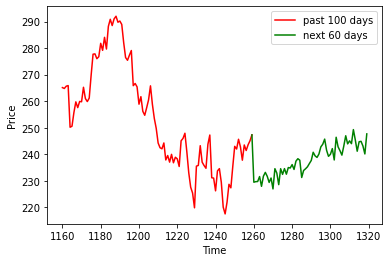

In [ ]:
plt.plot(range(1160,1260),MSFT_data['MSFT'][-100:],color='r',label='past 100 days')
plt.plot(range(1259,1320),predicted_next_60_list,color='g',label='next 60 days')

plt.ylabel('Price')
plt.xlabel('Time')
plt.legend()
plt.show()

Fourth

In [ ]:
multi_lstm=tf.keras.Sequential([ 
    tf.keras.layers.LSTM(128,return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(64,return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32,return_sequences=False),
    #tf.keras.layers
    tf.keras.layers.Dense(OUT_STEPS*num_features),
    tf.keras.layers.Reshape([OUT_STEPS,num_features])
])

In [ ]:
history=compile_and_fit(multi_lstm,wide_window)

Epoch 1/50
23/23 [==============================] - 14s 298ms/step - loss: 0.0595 - mean_absolute_error: 0.1817 - val_loss: 0.2384 - val_mean_absolute_error: 0.4448
Epoch 2/50
23/23 [==============================] - 6s 239ms/step - loss: 0.0089 - mean_absolute_error: 0.0626 - val_loss: 0.0834 - val_mean_absolute_error: 0.2643
Epoch 3/50
23/23 [==============================] - 5s 237ms/step - loss: 0.0023 - mean_absolute_error: 0.0356 - val_loss: 0.0567 - val_mean_absolute_error: 0.2171
Epoch 4/50
23/23 [==============================] - 5s 237ms/step - loss: 0.0020 - mean_absolute_error: 0.0336 - val_loss: 0.0533 - val_mean_absolute_error: 0.2100
Epoch 5/50
23/23 [==============================] - 5s 235ms/step - loss: 0.0023 - mean_absolute_error: 0.0363 - val_loss: 0.0461 - val_mean_absolute_error: 0.1925
Epoch 6/50
23/23 [==============================] - 6s 238ms/step - loss: 0.0021 - mean_absolute_error: 0.0345 - val_loss: 0.0546 - val_mean_absolute_error: 0.2130
Epoch 7/50
23/2

In [ ]:
last_90_data=total_data[-90:].to_numpy()
tensor_data=tf.convert_to_tensor(last_90_data[np.newaxis])

In [ ]:
predicted_next_60=multi_lstm(tensor_data)[0].numpy()

In [ ]:
min_value=min(MSFT_data['MSFT'])
max_value=max(MSFT_data['MSFT'])

In [ ]:
tranform_back=(max_value-min_value)*predicted_next_60[:,0]+min_value
predicted_next_60_list=list(tranform_back)
predicted_next_60_list.insert(0,MSFT_data['MSFT'][-1])

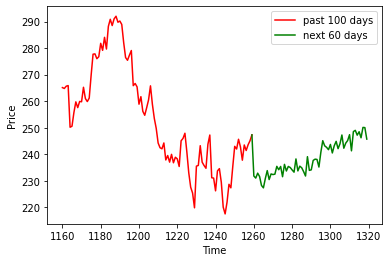

In [ ]:
plt.plot(range(1160,1260),MSFT_data['MSFT'][-100:],color='r',label='past 100 days')
plt.plot(range(1259,1320),predicted_next_60_list,color='g',label='next 60 days')

plt.ylabel('Price')
plt.xlabel('Time')
plt.legend()
plt.show()

Fifth

In [ ]:
multi_lstm=tf.keras.Sequential([ 
    tf.keras.layers.LSTM(128,return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(64,return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32,return_sequences=False),
    tf.keras.layers.Dense(OUT_STEPS*num_features),
    tf.keras.layers.Reshape([OUT_STEPS,num_features])
])

In [ ]:
history=compile_and_fit(multi_lstm,wide_window)

Epoch 1/50
23/23 [==============================] - 14s 330ms/step - loss: 0.0691 - mean_absolute_error: 0.2000 - val_loss: 0.2668 - val_mean_absolute_error: 0.4557
Epoch 2/50
23/23 [==============================] - 6s 241ms/step - loss: 0.0119 - mean_absolute_error: 0.0722 - val_loss: 0.0977 - val_mean_absolute_error: 0.2934
Epoch 3/50
23/23 [==============================] - 6s 266ms/step - loss: 0.0024 - mean_absolute_error: 0.0368 - val_loss: 0.0730 - val_mean_absolute_error: 0.2541
Epoch 4/50
23/23 [==============================] - 6s 240ms/step - loss: 0.0021 - mean_absolute_error: 0.0342 - val_loss: 0.0653 - val_mean_absolute_error: 0.2396
Epoch 5/50
23/23 [==============================] - 6s 239ms/step - loss: 0.0020 - mean_absolute_error: 0.0335 - val_loss: 0.0595 - val_mean_absolute_error: 0.2270
Epoch 6/50
23/23 [==============================] - 5s 236ms/step - loss: 0.0019 - mean_absolute_error: 0.0327 - val_loss: 0.0584 - val_mean_absolute_error: 0.2247
Epoch 7/50
23/2

In [ ]:
last_90_data=total_data[-90:].to_numpy()
tensor_data=tf.convert_to_tensor(last_90_data[np.newaxis])

In [ ]:
predicted_next_60=multi_lstm(tensor_data)[0].numpy()

In [ ]:
min_value=min(MSFT_data['MSFT'])
max_value=max(MSFT_data['MSFT'])

In [ ]:
tranform_back=(max_value-min_value)*predicted_next_60[:,0]+min_value
predicted_next_60_list=list(tranform_back)
predicted_next_60_list.insert(0,MSFT_data['MSFT'][-1])

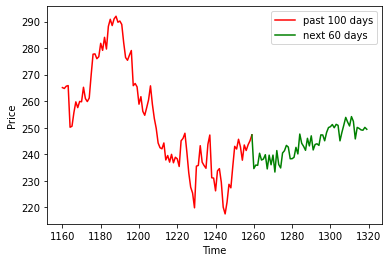

In [ ]:
plt.plot(range(1160,1260),MSFT_data['MSFT'][-100:],color='r',label='past 100 days')
plt.plot(range(1259,1320),predicted_next_60_list,color='g',label='next 60 days')

plt.ylabel('Price')
plt.xlabel('Time')
plt.legend()
plt.show()

Add more units

In [ ]:
multi_lstm=tf.keras.Sequential([ 
    tf.keras.layers.LSTM(256,return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(128,return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(64,return_sequences=False),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(OUT_STEPS*num_features),
    tf.keras.layers.Reshape([OUT_STEPS,num_features])
])

In [ ]:
history=compile_and_fit(multi_lstm,wide_window)

Epoch 1/50
23/23 [==============================] - 22s 656ms/step - loss: 0.0338 - mean_absolute_error: 0.1254 - val_loss: 0.0629 - val_mean_absolute_error: 0.2213
Epoch 2/50
23/23 [==============================] - 14s 595ms/step - loss: 0.0065 - mean_absolute_error: 0.0575 - val_loss: 0.0389 - val_mean_absolute_error: 0.1710
Epoch 3/50
23/23 [==============================] - 14s 586ms/step - loss: 0.0053 - mean_absolute_error: 0.0519 - val_loss: 0.0271 - val_mean_absolute_error: 0.1371
Epoch 4/50
23/23 [==============================] - 13s 584ms/step - loss: 0.0044 - mean_absolute_error: 0.0475 - val_loss: 0.0258 - val_mean_absolute_error: 0.1341
Epoch 5/50
23/23 [==============================] - 15s 645ms/step - loss: 0.0042 - mean_absolute_error: 0.0469 - val_loss: 0.0188 - val_mean_absolute_error: 0.1107
Epoch 6/50
23/23 [==============================] - 13s 584ms/step - loss: 0.0038 - mean_absolute_error: 0.0447 - val_loss: 0.0188 - val_mean_absolute_error: 0.1106
Epoch 7/50

In [ ]:
last_90_data=total_data[-90:].to_numpy()
tensor_data=tf.convert_to_tensor(last_90_data[np.newaxis])

In [ ]:
predicted_next_60=multi_lstm(tensor_data)[0].numpy()

In [ ]:
min_value=min(MSFT_data['MSFT'])
max_value=max(MSFT_data['MSFT'])

In [ ]:
tranform_back=(max_value-min_value)*predicted_next_60[:,0]+min_value
predicted_next_60_list=list(tranform_back)
predicted_next_60_list.insert(0,MSFT_data['MSFT'][-1])

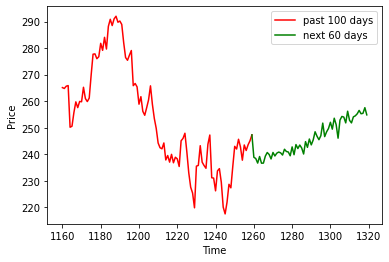

In [ ]:
plt.plot(range(1160,1260),MSFT_data['MSFT'][-100:],color='r',label='past 100 days')
plt.plot(range(1259,1320),predicted_next_60_list,color='g',label='next 60 days')

plt.ylabel('Price')
plt.xlabel('Time')
plt.legend()
plt.show()